# Simple Linear Regression Demo
This example demonstrates supervised machine learning by simple linear regression.

Workflow: (Problem Formulation + Data Ingestion) -> (Data Exploration and Wrangling) -> Training Model  -> Testing the Model -> (Validation of the model with new data) -> Implementation

## Step 1: Problem Formulation and Framing

We have access to data about bluegills fish: age and size of 78 exemplars. Based on the available data, we build a model of age/size dependencies that can be used for prediction of the age of any new speciment of the bluegills populatuon.

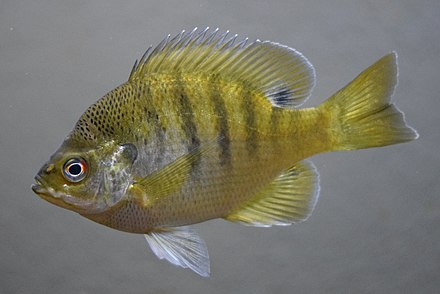

In [ ]:
# For data storage and manipulation
import pandas as pd
# for numeric computations
import numpy as np

In [ ]:
# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# for ML methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

In [ ]:
# for serialization and deserialization of data from and to a file
import pickle

## Step 2: Data Preparation

### 2.1 Read and Get to Know the Data

In [ ]:
# read the data
df = pd.read_csv("../../data/bluegills.txt", sep = '\t')

In [6]:
df.shape

(78, 2)

In [7]:
# see which are the attribute labels
list(df)

['age', 'length']

In [8]:
# get idea of the look
df.sample(5)

,age,length
46,4,170
23,4,144
69,3,130
30,4,154
48,4,140


In [9]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     78 non-null     int64
 1   length  78 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


### 2.2 Visualise the Data

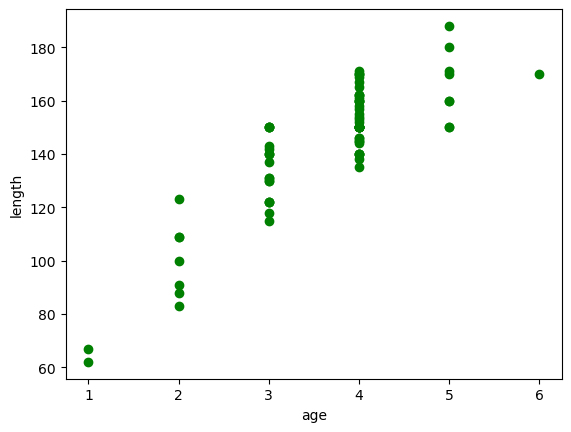

In [10]:
# skatter plot of all
plt.xlabel('age')
plt.ylabel('length')
plt.scatter(df.age, df.length, color='green')
plt.show()

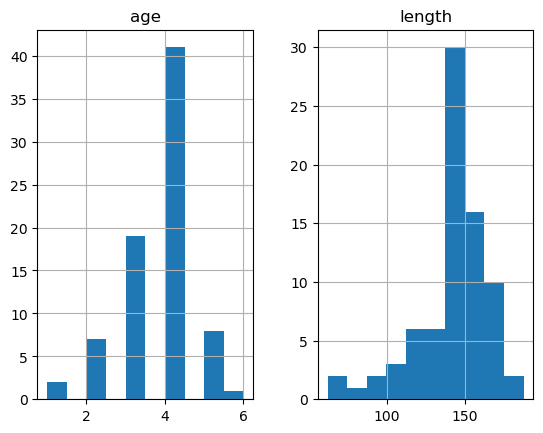

In [11]:
# histograms
hist = df.hist()

/var/folders/vm/wbcfv4bn6fvggqz29dlb30xw0000gt/T/ipykernel_2253/2616559449.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],  label='age', norm_hist=True)


<Axes: xlabel='age', ylabel='Density'>

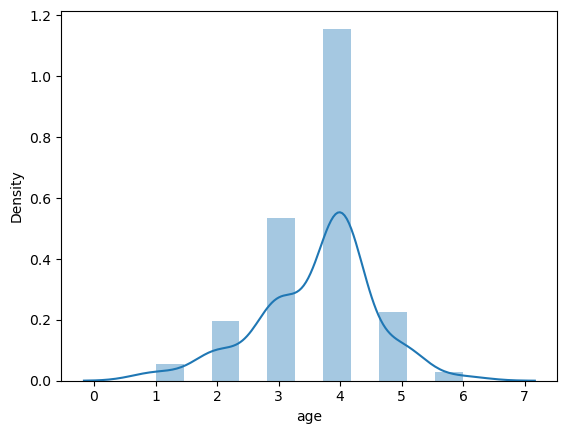

In [12]:
# distribution of age
sns.distplot(df['age'],  label='age', norm_hist=True)  

/var/folders/vm/wbcfv4bn6fvggqz29dlb30xw0000gt/T/ipykernel_2253/3837130849.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'],  label='length', norm_hist=True)


<Axes: xlabel='length', ylabel='Density'>

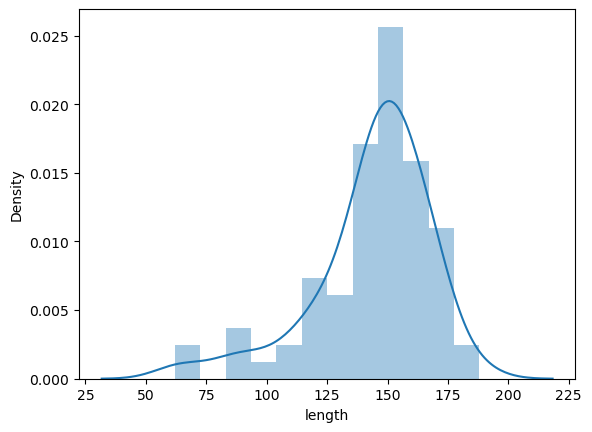

In [13]:
# distribution of lenght
sns.distplot(df['length'],  label='length', norm_hist=True) 

### 2.3 Clean the Data

In [14]:
# to check null values in data
df.isnull().sum()

age       0
length    0
dtype: int64

No missing or damaged values.

## Step 3. Explore the Descriptive Statistics of Data

### 3.1 Describe the Data

In [17]:
# get idea of basic statistical parameters for each column
df.describe()

,age,length
count,78.00,78.00
mean,3.63,143.60
std,0.93,24.14
min,1.00,62.00
25%,3.00,137.25
50%,4.00,150.00
75%,4.00,160.00
max,6.00,188.00


In [24]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.4f' % x)

### 3.2 Search for Outliers

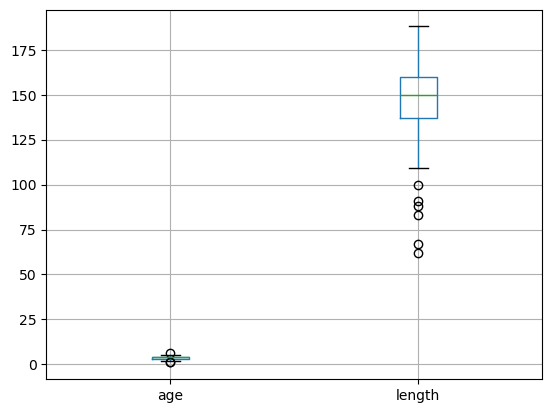

In [18]:
# box-wisker plot
boxplot = df.boxplot(column=['age', 'length'])  

In [19]:
# outliers by interquartile range (IQR)
from typing import List
def remove_outliers(df, data: List):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    IQR = q3 - q1
    # values smaller than 1.5 IQR below q1 and bigger that 1.5 IQR over q3 
    outliers = df[(data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR))]
    df = df.drop(outliers.index, inplace=True)
    return df

In [20]:
remove_outliers(df, df['length'])

In [21]:
df.shape

(72, 2)

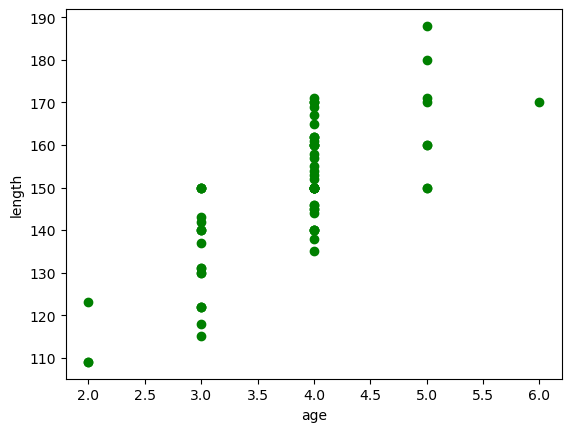

In [22]:
# skatter plot of all
plt.xlabel('age')
plt.ylabel('length')
plt.scatter(df.age, df.length, color='green')
plt.show()

### 3.3 Investigate the Inter-Dependencies of the Features
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [25]:
corr_matrix = df.corr()
corr_matrix

,age,length
age,1.0000,0.7530
length,0.7530,1.0000


<Axes: >

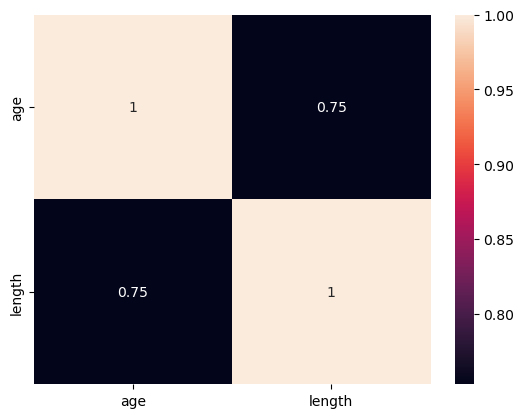

In [26]:
# plot the matrix as a heat map
# plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

## Step 4. Train a Model
Apply ML method from _LinearRegression_

In [27]:
df

,age,length
2,2,109
6,3,137
7,3,131
8,3,122
9,3,122
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


### 4.1 Choose Dependent and Independent Variables

In [28]:
# independent
X = df['length'].values.reshape(-1, 1)
# dependent
y = df['age'].values.reshape(-1, 1)

In [30]:
y

array([[2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [2],
       [4],
       [3],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [3],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [4],
       [6],
       [4],
       [5],
       [4],
       [4]])

reshape(-1, 1) means reshape to [unknown number of rows, one column]

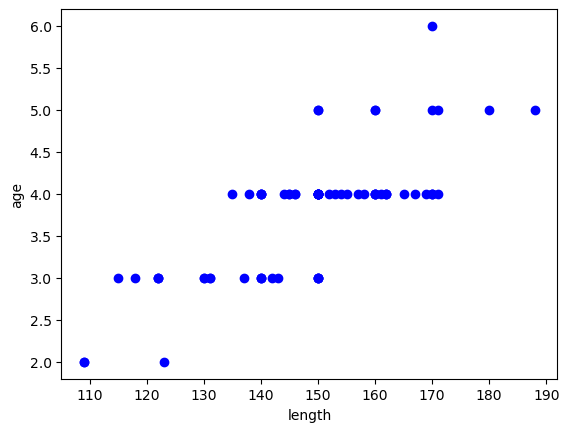

In [31]:
# plot all
plt.ylabel('age')
plt.xlabel('length')
plt.scatter(X, y, color='blue')
plt.show()

array([<Axes: >, <Axes: >], dtype=object)

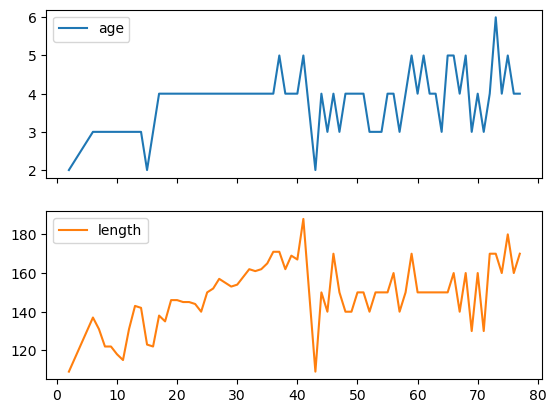

In [32]:
df.plot.line(subplots=True)

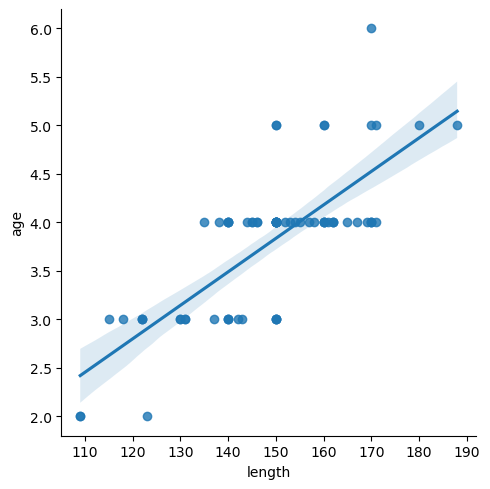

In [33]:
sns.lmplot(x='length',y='age',data=df,fit_reg=True) 

### 4.2 Split the Data into Training and Testing Sets

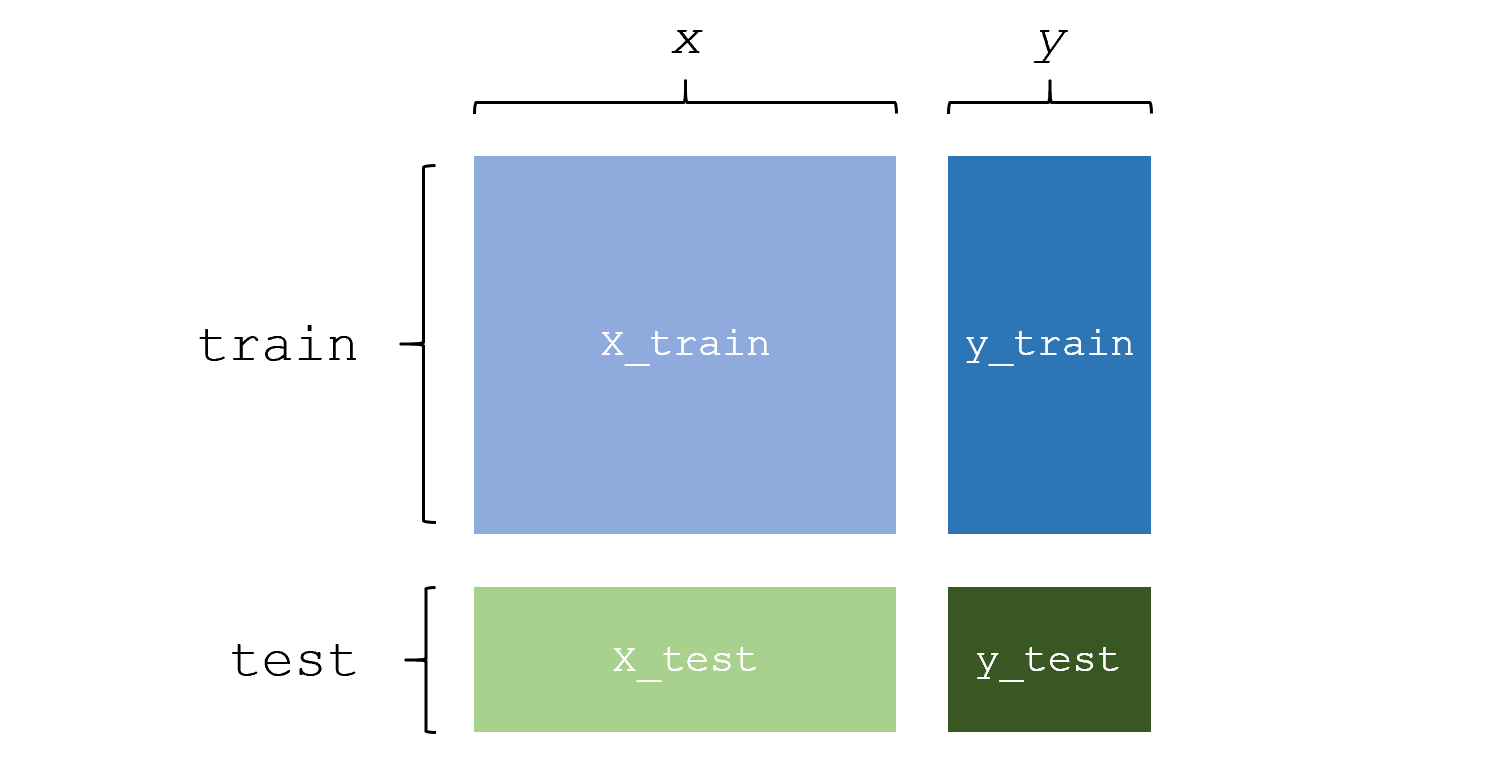

In [70]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [71]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(54, 1)
(54, 1)
(18, 1)
(18, 1)


### 4.3 Train a ML Model

In [72]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [73]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [74]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [75]:
a

array([[0.03478322]])

In [76]:
b

array([-1.33600028])

In [77]:
print(f"The model is a line, y = a * x + b, or y = {a} * x + {b}")

The model is a line, y = a * x + b, or y = [[0.03478322]] * x + [-1.33600028]


## Step 5: Test the Models

### 5.1 Test with the Test Data

In [78]:
y_predicted = myreg.predict(X_test)

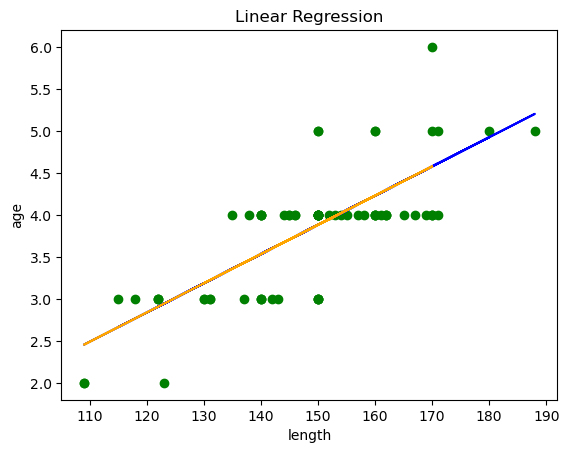

In [79]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()

In [81]:
#predict age from length
age_predicted = myreg.predict([[170]])
age_predicted

array([[4.5771463]])

In [82]:
age_predict = a * 170 + b
age_predict

array([[4.5771463]])

### 5.2 Predict with Unknown Data

In [69]:
# assume a new fish 
length = 145
age_predicted = myreg.predict([[length]])
age_predicted

array([[3.68523755]])

## Step 6: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [83]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

0.3284846180117913


In [84]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

0.14433435267942665


In [85]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

0.3799136121270553


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error, measured in the same units like the data
- **MSE** is more popular than MAE, because MSE amplifies larger errors, making it useful when larger errors are particularly costly
- **RMSE** is even more popular than MSE, because RMSE combines the benefits of both MSE and MAE

### Calculate R-squared

In [86]:
# Explained variance score: the proportion of the variance in a dependent variable that can be explained by the model
# 1 for perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.68


In [88]:
# R-squared: the proportion of the variation in the dependent variable that is predictable from the independent variable(s)
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

0.5861563693085465

This is bad result!

## Step 6: Store and then Reuse the Model

In [89]:
import joblib

In [90]:
# Store the model in a file
model_file = '../../data/mypolifit.pkl'

In [91]:
# save the model
joblib.dump(myreg, model_file)

['../../data/mypolifit.pkl']

In [92]:
# to load it later for reuse
my_model = joblib.load(model_file)

In [93]:
# evaluate model 
y_predict = my_model.predict(X_test)

In [95]:
# test the loaded model
age_prediction = my_model.predict([[170]])
print(age_prediction)

[[4.5771463]]


## Exercise
Your turn - analyse the house data

## Reference
https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression/notebook <br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>